<a href="https://colab.research.google.com/github/taavip/MAPlaneeringud/blob/main/plan_analyys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%time 

# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  python-numpy-doc python3-nose python3-numpy-dbg
The following NEW packages will be installed:
  python3-gdal python3-numpy
0 upgraded, 2 newly installed, 0 to remove and 37 not upgraded.
Need to get 2,288 kB of archives.
After this operation, 13.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-numpy amd64 1:1.13.3-2ubuntu1 [1,943 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python3-gdal amd64 2.2.3+dfsg-2 [346 kB]
Fetched 2,288 kB in 1s (1,797 kB/s)
Selecting previously unselected package python3-numpy.
(Reading database ... 155229 files and directories currently installed.)
Preparing to unpack .../python3-numpy_

In [2]:
pip install owslib

     |████████████████████████████████| 216 kB 5.3 MB/s 


In [3]:
import pandas as pd
import numpy as np
import re
import sklearn
import geopandas as gpd
from requests import Request
from owslib.wfs import WebFeatureService

# URL for WFS backend
url = "https://gsavalik.envir.ee/geoserver/planeeringud/ows?service=WFS"

# Initialize
wfs = WebFeatureService(url=url)

# Get data from WFS
# -----------------

# Fetch the last available layer (as an example) --> 'vaestoruutu:vaki2017_5km'
layers = list(wfs.contents)
layer = layers[3]

# Specify the parameters for fetching the data
params = dict(service='WFS', version="1.1.0", request='GetFeature',
      typeName=layer, outputFormat='json')

# Parse the URL with parameters
q = Request('GET', url, params=params).prepare().url

# Read data from URL
data = gpd.read_file(q)

In [4]:
layers

['planeeringud:detail_plan_juurdep',
 'planeeringud:detail_plan_sund',
 'planeeringud:detail_plan_avalik',
 'planeeringud:detail_plan_ala',
 'planeeringud:detail_plan_haljastus',
 'planeeringud:detail_plan_hoonestus',
 'planeeringud:detail_plan_kktingimus',
 'planeeringud:detail_plan_krunt',
 'planeeringud:detail_plan_kuja',
 'planeeringud:detail_plan_maapar',
 'planeeringud:detail_plan_rajatis',
 'planeeringud:detail_plan_servituut',
 'planeeringud:detail_plan_transp',
 'planeeringud:detail_plan_tehno',
 'planeeringud:detail_plan_tingimus',
 'planeeringud:detail_plan_valveplaan',
 'planeeringud:detail_plan_valveplaan_osa',
 'planeeringud:ehak_tiheasustus',
 'planeeringud:rb_planeeringutrass',
 'planeeringud:yld_plan_ala',
 'planeeringud:yld_plan_juurdep',
 'planeeringud:detail_plan_koko',
 'planeeringud:yld_plan_jaade',
 'planeeringud:yld_plan_kktingimus',
 'planeeringud:yld_plan_maakas',
 'planeeringud:yld_plan_vaartmiljoo',
 'planeeringud:yld_plan_ala_osa',
 'planeeringud:maaamet__r

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ea79b8dd0>,
      dtype=object)

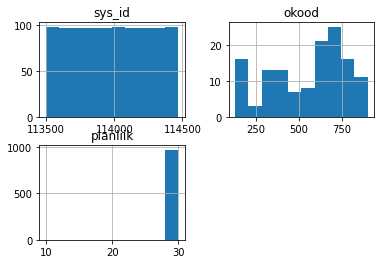

In [5]:
data.hist()


In [6]:
data["vastuvkp"] = data["vastuvkp"].astype("datetime64")

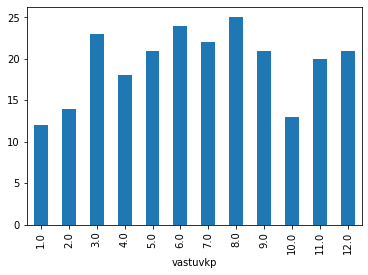

In [7]:
data["vastuvkp"].groupby(data["vastuvkp"].dt.month).count().plot(kind="bar")

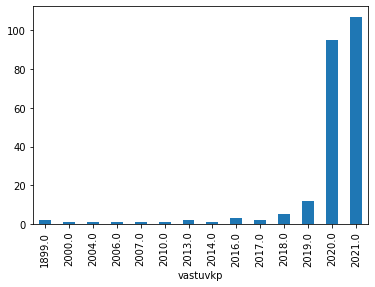

In [8]:
data["vastuvkp"].groupby(data["vastuvkp"].dt.year).count().plot(kind="bar")

In [9]:
data

,id,sys_id,planid,dp_kiht,oid,okood,plannim,planliik,planliik_vaste,planeesm,planseis,planseis_vaste,algatkp,vastuvkp,kehtestkp,planksh,planviide,muutkp,muutnr,seos_ma,arhiiv_digi,avalik,plan_kihid,yp_muutev,allikas,stamp_upd,geometry
0,detail_plan_ala.0,113498,90412,DP_plan_ala,1,714.0,Laratsi II detailplaneering,30,Detailplaneering,Detailplaneeringu eesmärgiks on ehitusõiguse m...,10,Planeering on kehtiv,2019-06-28,2020-09-08,2021-01-26,None,https://gis.saaremaavald.ee/failid/DP/DP-19-002/,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,None,MA sisestatud,2021-12-10,"POLYGON ((396038.110 6486828.740, 396335.080 6..."
1,detail_plan_ala.1,113499,88092,DP_plan_ala,18,353.0,"Andineeme külas, Tülivere ühistu 26 ja Tüliver...",10,Maakonnaplaneering; sh osa hõlmav ja teemaplan...,Kahe elamu krundi moodustamine. Maatükid kokku...,10,Planeering on kehtiv,2020-07-02,2020-12-31,2021-02-25,None,https://xgis.maaamet.ee/xgis2/page/app/maainfo,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,None,MA sisestatud,2021-12-10,"POLYGON ((582116.026 6595820.950, 582100.958 6..."
2,detail_plan_ala.2,113500,92752,DP_plan_ala,3,198.0,Ilmandu külas Tarna tee 1 maaüksuse ja lähiala...,30,Detailplaneering,Detailplaneeringu koostamise eesmärgiks on sel...,10,Planeering on kehtiv,2016-12-15,2020-05-28,2021-02-16,None,https://harku.maps.arcgis.com/apps/webappviewe...,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,None,MA sisestatud,2021-12-10,"POLYGON ((527095.582 6588911.951, 527021.498 6..."
3,detail_plan_ala.3,113501,80372,DP_plan_ala,1,NaN,Meierei tn 36 kinnistu ja lähiala detailplanee...,30,Detailplaneering,Detailplaneeringu koostamise eesmärgiks on kin...,10,Planeering on kehtiv,2019-02-11,2021-02-22,2021-05-24,None,http://atp.amphora.ee/raasikuvv/index.aspx?itm...,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,None,MA sisestatud,2021-12-10,"POLYGON ((567673.829 6581797.095, 567584.551 6..."
4,detail_plan_ala.4,113502,95092,DP_plan_ala,7,NaN,Matise detailplaneering,30,Detailplaneering,Elamukruntidele ehitusõiguse määramine ehitusk...,10,Planeering on kehtiv,2020-02-28,2021-02-26,2021-08-27,None,https://www.saaremaavald.ee/detailplaneeringud...,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,jah,MA sisestatud,2021-12-10,"POLYGON ((377561.276 6465387.797, 377559.189 6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,detail_plan_ala.968,114466,103434,DP_plan_ala,22,NaN,Kõrtsi maaüksuse ja lähiala detailplaneering,30,Detailplaneering,jagada Aegviidu alevi Kõrtsi kinnistu üheksaks...,10,Planeering on kehtiv,2020-09-29,2021-08-31,2021-11-16,None,Anija Vallavalitsus (amphora.ee),None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,None,MA sisestatud,2022-01-04,"POLYGON ((591703.590 6572728.290, 591789.320 6..."
969,detail_plan_ala.969,114467,99954,DP_plan_ala,1,NaN,Ratsakooli detailplaneering Rapla vald...,30,Detailplaneering,Detailplaneeringu eesmärk on ratsatalu komplek...,10,Planeering on kehtiv,2021-06-14,2021-11-15,2021-12-20,None,https://atp.amphora.ee/raplavv2017/index.aspx?...,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,None,MA sisestatud,2022-01-04,"POLYGON ((545034.510 6538427.520, 545090.010 6..."
970,detail_plan_ala.970,114468,103573,DP_plan_ala,2,NaN,Kingutamme kinnistu detailplaneering\n,30,Detailplaneering,"Ehitusõiguse, tehnovarustuse, ligipääsude ja h...",10,Planeering on kehtiv,2021-06-16,2021-11-03,2021-12-16,None,https://www.torivald.ee/rutavere-kula-kingutam...,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja di

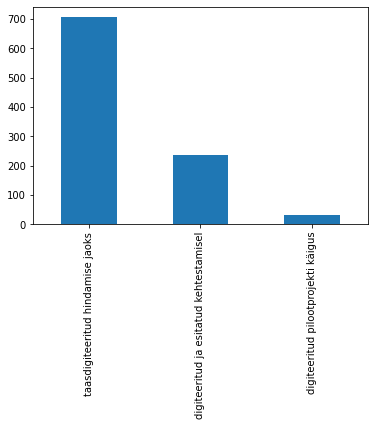

In [10]:
data["plan_kihid"].value_counts()[:10].plot(kind='bar')

In [11]:
#pd.unique(data["vastuvkp"])

# Krunt

In [12]:
layer = layers[7]

# Specify the parameters for fetching the data
params = dict(service='WFS', version="1.1.0", request='GetFeature',
      typeName=layer, outputFormat='json')

# Parse the URL with parameters
q = Request('GET', url, params=params).prepare().url

# Read data from URL
krunt = gpd.read_file(q)

In [13]:
krunt

,id,sys_id,planid,objectid,dp_kiht,oid,okood,otstarve,tingimus,pind,tahis,nimetus,parkimis_arv,allikas,stamp_upd,geometry
0,detail_plan_krunt.0,623949,1182,2,DP_krunt,1,725.0,Maatulundusmaa 65; Elamumaa 35,None,NaN,M65; EE35,None,None,MA sisestatud,2021-11-17,"POLYGON ((524122.900 6561694.600, 524188.250 6..."
1,detail_plan_krunt.1,623950,1182,1,DP_krunt,2,725.0,Maatulundusmaa 65; Elamumaa 35,None,NaN,M65; EE35,None,None,MA sisestatud,2021-11-17,"POLYGON ((524112.940 6561816.240, 524188.250 6..."
2,detail_plan_krunt.2,623951,1180,3,DP_krunt,1,725.0,Elamumaa,None,2629.0,E;,None,None,MA sisestatud,2021-11-17,"POLYGON ((521111.910 6564343.720, 521135.100 6..."
3,detail_plan_krunt.3,623952,1180,12,DP_krunt,5,725.0,Elamumaa,None,1142.0,E;,None,None,MA sisestatud,2021-11-17,"POLYGON ((520995.350 6564304.020, 521016.370 6..."
4,detail_plan_krunt.4,623953,1180,üldmaa,DP_krunt,16,725.0,Üldkasutatav maa,None,10187.0,Ü;,None,None,MA sisestatud,2021-11-17,"POLYGON ((521016.840 6564426.160, 521063.110 6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4123,detail_plan_krunt.4123,628072,93593,4,DP_krunt,10,890.0,Tee ja tänava maa,None,4211.0,LT,None,None,MA sisestatud,2021-11-17,"POLYGON ((550259.305 6595861.123, 550269.825 6..."
4124,detail_plan_krunt.4124,628073,93593,5,DP_krunt,9,890.0,Tee ja tänava maa,None,3408.0,LT,None,None,MA sisestatud,2021-11-17,"POLYGON ((550148.620 6595938.490, 550159.950 6..."
4125,detail_plan_krunt.4125,628074,93593,2,DP_krunt,6,890.0,Looduslik maa,None,3261.0,HL,None,None,MA sisestatud,2021-11-17,"POLYGON ((550259.305 6595861.123, 550273.370 6..."
4126,detail_plan_krunt.4126,628075,90412,2,DP_krunt,4,NaN,Maatulundusmaa,None,39176.0,M;,Pos2,None,MA sisestatud,2021-11-17,"POLYGON ((396201.833 6486848.786, 396335.080 6..."


In [14]:
soid=0
df = pd.DataFrame()

for i in krunt.index.values.tolist():
  #print(krunt.iloc[i])
  if (krunt.iloc[i].otstarve is not None):
    so_arv = len(krunt.iloc[i].otstarve.split(";"))
  else:
    so_arv = 1
  
  for j in range(so_arv):
    df.at[soid, 'index'] = i
    df.at[soid, 'oid'] = int(krunt.iloc[i].oid)
    df.at[soid, 'index'] = krunt.iloc[i].planid
    df.at[soid, 'algne_otstarve'] = krunt.iloc[i].otstarve
    df.at[soid, 'algne_tahis'] = krunt.iloc[i].tahis
    df.at[soid, 'so_arv'] = so_arv
    if (krunt.iloc[i].otstarve is not None):
      s = krunt.iloc[i].otstarve.split(";")[j]
      df.at[soid, 'otstarve'] = s
      df.at[soid, 'numbers'] = sum(c.isdigit() for c in s)
      df.at[soid, 'letters'] = sum(c.isalpha() for c in s)
      df.at[soid, 'spaces']  = sum(c.isspace() for c in s)
      df.at[soid, 'upper']  = sum(c.isupper() for c in s)
      df.at[soid, 'others']  = len(s) - df.iloc[soid].numbers - df.iloc[soid].letters - df.iloc[soid].spaces
    if (krunt.iloc[i].tahis is not None):
      #if (krunt.iloc[i].tahis.split(";")[j] is not None):
      if so_arv>len(krunt.iloc[i].tahis.split(";")) and j+1>len(krunt.iloc[i].tahis.split(";")):
        df.at[soid, 'tahis'] = np.nan
      else:
        df.at[soid, 'tahis'] = krunt.iloc[i].tahis.split(";")[j]
    soid=soid+1


df["index"] = df["index"].astype(float).astype(int)
df["oid"] = df["oid"].astype(float).astype(int)
df["so_arv"] = df["so_arv"].astype(float).astype(int)
df["numbers"] = df["numbers"].fillna(0).astype(float).astype(int)
df["letters"] = df["letters"].fillna(0).astype(float).astype(int)
df["spaces"] = df["spaces"].fillna(0).astype(float).astype(int)
df["upper"] = df["upper"].fillna(0).astype(float).astype(int)
df["others"] = df["others"].fillna(0).astype(float).astype(int)
df


,index,oid,algne_otstarve,algne_tahis,so_arv,otstarve,numbers,letters,spaces,upper,others,tahis
0,1182,1,Maatulundusmaa 65; Elamumaa 35,M65; EE35,2,Maatulundusmaa 65,2,14,1,1,0,M65
1,1182,1,Maatulundusmaa 65; Elamumaa 35,M65; EE35,2,Elamumaa 35,2,8,2,1,0,EE35
2,1182,2,Maatulundusmaa 65; Elamumaa 35,M65; EE35,2,Maatulundusmaa 65,2,14,1,1,0,M65
3,1182,2,Maatulundusmaa 65; Elamumaa 35,M65; EE35,2,Elamumaa 35,2,8,2,1,0,EE35
4,1180,1,Elamumaa,E;,1,Elamumaa,0,8,0,1,0,E
...,...,...,...,...,...,...,...,...,...,...,...,...
4986,93593,10,Tee ja tänava maa,LT,1,Tee ja tänava maa,0,14,4,1,0,LT
4987,93593,9,Tee ja tänava maa,LT,1,Tee ja tänava maa,0,14,4,1,0,LT
4988,93593,6,Looduslik maa,HL,1,Looduslik maa,0,12,2,1,0,HL
4989,90412,4,Maatulundusmaa,M;,1,Maatulundusmaa,0,14,1,1,0,M


In [15]:
def strip_element1(my_list):
  return list(filter(lambda x: x.replace('=','').replace('<','').replace('>','').replace('%','') != "", [x.replace('=','').replace('<','').replace('>','').replace('%','') for x in my_list]))

In [16]:
def strip_element(my_list):
  return list(filter(lambda x: re.sub('maa-ala$', '', re.sub('maa$', '', x.strip())).replace('=','').replace('<','').replace('>','').replace('%','').replace('–','').replace('-','').strip().replace(' ma','').strip() != "", [re.sub('maa-ala$', '', re.sub('maa$', '', x.strip())).replace('=','').replace('<','').replace('>','').replace('%','').replace('–','').replace('-','').strip() for x in my_list]))

In [17]:
df["otstarve_l"] = df["otstarve"].str.split(r'(\d+)')
#df["otstarve_l"] = df["otstarve_l"].str.strip()
for row in df.loc[df.otstarve_l.isnull(), 'otstarve_l'].index:
    df.at[row, 'otstarve_l'] = []

df['otstarve_l']=df['otstarve_l'].apply(strip_element1)
df["otstarve_ll"] = df["otstarve_l"].str.len()
df["otstarve_ll"] = df["otstarve_ll"].fillna(0).astype(float).astype(int)
df

,index,oid,algne_otstarve,algne_tahis,so_arv,otstarve,numbers,letters,spaces,upper,others,tahis,otstarve_l,otstarve_ll
0,1182,1,Maatulundusmaa 65; Elamumaa 35,M65; EE35,2,Maatulundusmaa 65,2,14,1,1,0,M65,"[Maatulundusmaa , 65]",2
1,1182,1,Maatulundusmaa 65; Elamumaa 35,M65; EE35,2,Elamumaa 35,2,8,2,1,0,EE35,"[ Elamumaa , 35]",2
2,1182,2,Maatulundusmaa 65; Elamumaa 35,M65; EE35,2,Maatulundusmaa 65,2,14,1,1,0,M65,"[Maatulundusmaa , 65]",2
3,1182,2,Maatulundusmaa 65; Elamumaa 35,M65; EE35,2,Elamumaa 35,2,8,2,1,0,EE35,"[ Elamumaa , 35]",2
4,1180,1,Elamumaa,E;,1,Elamumaa,0,8,0,1,0,E,[Elamumaa],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4986,93593,10,Tee ja tänava maa,LT,1,Tee ja tänava maa,0,14,4,1,0,LT,[Tee ja tänava maa ],1
4987,93593,9,Tee ja tänava maa,LT,1,Tee ja tänava maa,0,14,4,1,0,LT,[Tee ja tänava maa ],1
4988,93593,6,Looduslik maa,HL,1,Looduslik maa,0,12,2,1,0,HL,[Looduslik maa ],1
4989,90412,4,Maatulundusmaa,M;,1,Maatulundusmaa,0,14,1,1,0,M,[Maatulundusmaa ],1


In [18]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])



In [19]:
import string 
import re
count_so=to_1D(df["otstarve_l"]).value_counts().to_frame('count')
count_so['len']=count_so.index.str.len()
count_so['num']=count_so.index.str.isnumeric()
count_so['comma']=count_so.index.str.count(",")
count_so['slash']=count_so.index.str.count("/")
count_so['percent']=count_so.index.str.count("%")
count_so['braket']= count_so.index.str.count('\(') + count_so.index.str.count('\)')
count_so['punktu']= count_so.index.str.count(f'[{re.escape(string.punctuation)}]')
count_so['maa']= count_so.index.str.count('maa')
count_so['maa-ala']= count_so.index.str.count('maa-ala')
count_so['hoone']= count_so.index.str.count('hoone')
count_so['ehitis']= count_so.index.str.count('ehitis')
count_so['rajatis']= count_so.index.str.count('rajatis')
count_so['ots_l']=count_so.index.str.lower().str.replace('sat-siooni','satsiooni').str.replace('hoonete','').str.replace('hoone','').str.replace('ehititste','').str.replace('ehitiste','').str.replace('ehitise','').str.replace('rajatise','').str.replace('rajatiste','').str.replace('ja/','').str.replace(' maa-ala','').str.replace('y','ü').str.replace('/',';').str.replace('%','').str.replace('\n','').str.replace('=','').str.replace('≥','').str.replace('≤','').str.replace('<','').str.replace('>','').str.replace('bt bb', 'bt;bb').str.replace('ja ', ';').str.replace(',', ';').str.replace('…', ';').str.replace('.', ';').str.replace('(', ';').str.replace(')', ';').str.replace('või', ';').str.replace('vähemalt', ';').str.replace('kuni', ';').str.replace('max', ';').str.replace('min', ';').str.strip(' ').str.replace('-',';')
count_so['ots_l']=count_so['ots_l'].str.split(';')
count_so['ots_l']=count_so['ots_l'].apply(strip_element)
count_so

,count,len,num,comma,slash,percent,braket,punktu,maa,maa-ala,hoone,ehitis,rajatis,ots_l
,1786,1,False,0,0,0,0,0,0,0,0,0,0,[]
100,1136,3,True,0,0,0,0,0,0,0,0,0,0,[100]
Ä,674,2,False,0,0,0,0,0,0,0,0,0,0,[ä]
EK,479,3,False,0,0,0,0,0,0,0,0,0,0,[ek]
Elamumaa,378,9,False,0,0,0,0,0,1,0,0,0,0,[elamu]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"ÜH, Ük",1,7,False,1,0,0,0,1,0,0,0,0,0,"[üh, ük]"
või E,1,7,False,0,0,0,0,0,0,0,0,0,0,[e]
Ä/T,1,4,False,0,1,0,0,1,0,0,0,0,0,"[ä, t]"
16,1,2,True,0,0,0,0,0,0,0,0,0,0,[16]


In [20]:
test=to_1D(count_so["ots_l"]).to_frame('index')
test.value_counts()

index                
kaubandus                26
tootmis                  24
teenindus                23
äri                      19
toitlustus               19
                         ..
lb                        1
tt                        1
trantspordi               1
looduslik puhkehaljas     1
0                         1
Length: 174, dtype: int64

In [21]:

test=to_1D(count_so["ots_l"]).to_frame('index')
#test.reset_index(inplace=True)




test.loc[test['index'].str.len()<=3, 'type'] = 'ly'
test.loc[test['index'].str.len()>3, 'type'] = 'so'
test.loc[test['index'].str.isnumeric(), 'type'] = 'num'
test.loc[test['index'] == 'äri', 'type'] = 'so'
test.loc[test['index'] == 'tee', 'type'] = 'so'
test.loc[test['index'] == 'lao', 'type'] = 'so'
test

,index,type
0,100,num
1,ä,ly
2,ek,ly
3,elamu,so
4,e,ly
...,...,...
552,e,ly
553,ä,ly
554,t,ly
555,16,num


In [22]:
!pip install string-grouper

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for sparse-dot-topn-for-blocks: filename=sparse_dot_topn_for_blocks-0.3.1.post3-cp37-cp37m-linux_x86_64.whl size=1768981 sha256=a0fa49745832af60904c979e4178bb079f7bd536867d7e556170a4f42811af9e
  Stored in directory: /root/.cache/pip/wheels/b1/85/ec/cc535ffd28c568ccc7f7969f2a2b59b87676ff5819b437bc78
  Created wheel for topn: filename=topn-0.0.7-cp37-cp37m-linux_x86_64.whl size=1178478 sha256=57de5018e016464cbec560e28af2fef53eab95891efd7503f488f143bdf1dc2e
  Stored in directory: /root/.cache/pip/wheels/ff/ae/11/24e76a3a7d2171b9165b74af01a0ff6c4e8134124652d0f1f1
Successfully built sparse-dot-topn-for-blocks topn


In [39]:
from string_grouper import match_strings, match_most_similar, group_similar_strings, StringGrouper
# Add the grouped strings
test['dd']=group_similar_strings(test['index'],ignore_index=True,min_similarity=0.65)
# Show items with most duplicates
test.groupby('dd')['index'].apply(list).to_frame()

,index
dd,
0,[0]
10,[10]
100,"[100, 1000]"
12,[12]
14,[14]
...,...
üksikelamu,"[üksikelamu, üksikelamu, üksikelamu, üksikelam..."
üld,[üld]
üldkasutatav,"[üldkasutatav, üldkasutatav, üldkasuatav, üldk..."


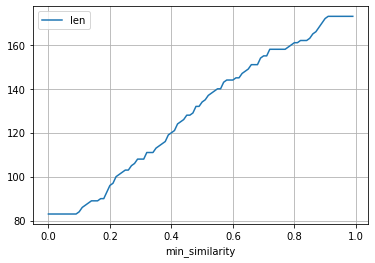

In [24]:
df1 = pd.DataFrame(columns = ['len', 'min_similarity'])
for i in  range(100):
  test['dd']=group_similar_strings(test['index'],ignore_index=True,min_similarity=(i/100))
  df1 = df1.append({'min_similarity' : i/100, 'len' : len(test.groupby('dd').count())}, 
                ignore_index = True)
df1.plot.line(x='min_similarity', grid=True)
  


In [40]:
test

,index,type,dd
0,100,num,100
1,ä,ly,ä
2,ek,ly,ek
3,elamu,so,elamu
4,e,ly,e
...,...,...,...
552,e,ly,e
553,ä,ly,ä
554,t,ly,t
555,16,num,16


In [26]:
count_so

,count,len,num,comma,slash,percent,braket,punktu,maa,maa-ala,hoone,ehitis,rajatis,ots_l
,1786,1,False,0,0,0,0,0,0,0,0,0,0,[]
100,1136,3,True,0,0,0,0,0,0,0,0,0,0,[100]
Ä,674,2,False,0,0,0,0,0,0,0,0,0,0,[ä]
EK,479,3,False,0,0,0,0,0,0,0,0,0,0,[ek]
Elamumaa,378,9,False,0,0,0,0,0,1,0,0,0,0,[elamu]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"ÜH, Ük",1,7,False,1,0,0,0,1,0,0,0,0,0,"[üh, ük]"
või E,1,7,False,0,0,0,0,0,0,0,0,0,0,[e]
Ä/T,1,4,False,0,1,0,0,1,0,0,0,0,0,"[ä, t]"
16,1,2,True,0,0,0,0,0,0,0,0,0,0,[16]


In [27]:
lst_col = 'ots_l'
count_so.reset_index(inplace=True)
count_so1 =pd.DataFrame({col:np.repeat(count_so[col].values, count_so[lst_col].str.len()) for col in count_so.columns.difference([lst_col])}).assign(**{lst_col:np.concatenate(count_so[lst_col].values)})[count_so.columns.tolist()]

In [41]:
test.groupby('dd')['index'].apply(list).to_frame()

,index
dd,
0,[0]
10,[10]
100,"[100, 1000]"
12,[12]
14,[14]
...,...
üksikelamu,"[üksikelamu, üksikelamu, üksikelamu, üksikelam..."
üld,[üld]
üldkasutatav,"[üldkasutatav, üldkasutatav, üldkasuatav, üldk..."


In [42]:
#result = pd.concat([count_so, test], keys=["ots_l", "index"])
test1 =test.groupby('index').max()
test1.reset_index(inplace=True)
test1

result = pd.merge(count_so1, test1, left_on='ots_l', right_on='index')
result

,index_x,count,len,num,comma,slash,percent,braket,punktu,maa,maa-ala,hoone,ehitis,rajatis,ots_l,index_y,type,dd
0,100,1136,3,True,0,0,0,0,0,0,0,0,0,0,100,100,num,100
1,Ä,674,2,False,0,0,0,0,0,0,0,0,0,0,ä,ä,ly,ä
2,Ä,302,3,False,0,0,0,0,0,0,0,0,0,0,ä,ä,ly,ä
3,Ä,9,1,False,0,0,0,0,0,0,0,0,0,0,ä,ä,ly,ä
4,Ä,6,2,False,0,0,0,0,0,0,0,0,0,0,ä,ä,ly,ä
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,1000,1,4,True,0,0,0,0,0,0,0,0,0,0,1000,1000,num,100
553,91,1,2,True,0,0,0,0,0,0,0,0,0,0,91,91,num,91
554,üldmaa,1,7,False,0,0,0,0,0,1,0,0,0,0,üld,üld,ly,üld
555,93,1,2,True,0,0,0,0,0,0,0,0,0,0,93,93,num,93


In [43]:

result.loc[result['type'] == 'so', 'so_u'] = result['dd']
result.loc[result['type'] == 'ly', 'ly_u'] = result['dd']
result.loc[result['type'] == 'num', 'num_u'] = result['dd']
result

,index_x,count,len,num,comma,slash,percent,braket,punktu,maa,maa-ala,hoone,ehitis,rajatis,ots_l,index_y,type,dd,so_u,ly_u,num_u
0,100,1136,3,True,0,0,0,0,0,0,0,0,0,0,100,100,num,100,NaN,NaN,100
1,Ä,674,2,False,0,0,0,0,0,0,0,0,0,0,ä,ä,ly,ä,NaN,ä,NaN
2,Ä,302,3,False,0,0,0,0,0,0,0,0,0,0,ä,ä,ly,ä,NaN,ä,NaN
3,Ä,9,1,False,0,0,0,0,0,0,0,0,0,0,ä,ä,ly,ä,NaN,ä,NaN
4,Ä,6,2,False,0,0,0,0,0,0,0,0,0,0,ä,ä,ly,ä,NaN,ä,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,1000,1,4,True,0,0,0,0,0,0,0,0,0,0,1000,1000,num,100,NaN,NaN,100
553,91,1,2,True,0,0,0,0,0,0,0,0,0,0,91,91,num,91,NaN,NaN,91
554,üldmaa,1,7,False,0,0,0,0,0,1,0,0,0,0,üld,üld,ly,üld,NaN,üld,NaN
555,93,1,2,True,0,0,0,0,0,0,0,0,0,0,93,93,num,93,NaN,NaN,93


In [45]:
result.groupby('index_x').agg({'so_u': [list],'ly_u': [list],'num_u': [list]}).reset_index()

,index_x,so_u,ly_u,num_u
,,list,list,list
0,\nElamumaa,[elamu],[nan],[nan]
1,Looduslik maa,[looduslik],[nan],[nan]
2,Muu looduslik maa,[looduslik],[nan],[nan]
3,"Turismi-, matka- ja väljasõidukoha maa","[matka, väljasõidukoha, turismi]","[nan, nan, nan]","[nan, nan, nan]"
4,Ärimaa,[äri],[nan],[nan]
...,...,...,...,...
384,ühiskondliku hoone maa,[ühiskondlike],[nan],[nan]
385,üksikelamu maa,[üksikelamu],[nan],[nan]
386,üksikelamu maa/kaksikelamu maa,"[üksikelamu, üksikelamu]","[nan, nan]","[nan, nan]"


In [46]:
df

,index,oid,algne_otstarve,algne_tahis,so_arv,otstarve,numbers,letters,spaces,upper,others,tahis,otstarve_l,otstarve_ll
0,1182,1,Maatulundusmaa 65; Elamumaa 35,M65; EE35,2,Maatulundusmaa 65,2,14,1,1,0,M65,"[Maatulundusmaa , 65]",2
1,1182,1,Maatulundusmaa 65; Elamumaa 35,M65; EE35,2,Elamumaa 35,2,8,2,1,0,EE35,"[ Elamumaa , 35]",2
2,1182,2,Maatulundusmaa 65; Elamumaa 35,M65; EE35,2,Maatulundusmaa 65,2,14,1,1,0,M65,"[Maatulundusmaa , 65]",2
3,1182,2,Maatulundusmaa 65; Elamumaa 35,M65; EE35,2,Elamumaa 35,2,8,2,1,0,EE35,"[ Elamumaa , 35]",2
4,1180,1,Elamumaa,E;,1,Elamumaa,0,8,0,1,0,E,[Elamumaa],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4986,93593,10,Tee ja tänava maa,LT,1,Tee ja tänava maa,0,14,4,1,0,LT,[Tee ja tänava maa ],1
4987,93593,9,Tee ja tänava maa,LT,1,Tee ja tänava maa,0,14,4,1,0,LT,[Tee ja tänava maa ],1
4988,93593,6,Looduslik maa,HL,1,Looduslik maa,0,12,2,1,0,HL,[Looduslik maa ],1
4989,90412,4,Maatulundusmaa,M;,1,Maatulundusmaa,0,14,1,1,0,M,[Maatulundusmaa ],1


In [47]:
lst_col = 'otstarve_l'
#df.reset_index(inplace=True)
df_1 =pd.DataFrame({col:np.repeat(df[col].values, df[lst_col].str.len()) for col in df.columns.difference([lst_col])}).assign(**{lst_col:np.concatenate(df[lst_col].values)})[df.columns.tolist()]
df_1

,index,oid,algne_otstarve,algne_tahis,so_arv,otstarve,numbers,letters,spaces,upper,others,tahis,otstarve_l,otstarve_ll
0,1182,1,Maatulundusmaa 65; Elamumaa 35,M65; EE35,2,Maatulundusmaa 65,2,14,1,1,0,M65,Maatulundusmaa,2
1,1182,1,Maatulundusmaa 65; Elamumaa 35,M65; EE35,2,Maatulundusmaa 65,2,14,1,1,0,M65,65,2
2,1182,1,Maatulundusmaa 65; Elamumaa 35,M65; EE35,2,Elamumaa 35,2,8,2,1,0,EE35,Elamumaa,2
3,1182,1,Maatulundusmaa 65; Elamumaa 35,M65; EE35,2,Elamumaa 35,2,8,2,1,0,EE35,35,2
4,1182,2,Maatulundusmaa 65; Elamumaa 35,M65; EE35,2,Maatulundusmaa 65,2,14,1,1,0,M65,Maatulundusmaa,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9471,93593,10,Tee ja tänava maa,LT,1,Tee ja tänava maa,0,14,4,1,0,LT,Tee ja tänava maa,1
9472,93593,9,Tee ja tänava maa,LT,1,Tee ja tänava maa,0,14,4,1,0,LT,Tee ja tänava maa,1
9473,93593,6,Looduslik maa,HL,1,Looduslik maa,0,12,2,1,0,HL,Looduslik maa,1
9474,90412,4,Maatulundusmaa,M;,1,Maatulundusmaa,0,14,1,1,0,M,Maatulundusmaa,1


In [72]:
result_1 = pd.merge(df_1, result.groupby('index_x').agg({'so_u': [list],'ly_u': [list],'num_u': [list]}).reset_index(), left_on='otstarve_l', right_on='index_x')
result_1

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


,index,oid,algne_otstarve,algne_tahis,so_arv,otstarve,numbers,letters,spaces,upper,others,tahis,otstarve_l,otstarve_ll,"(index_x, )","(so_u, list)","(ly_u, list)","(num_u, list)"
0,1182,1,Maatulundusmaa 65; Elamumaa 35,M65; EE35,2,Maatulundusmaa 65,2,14,1,1,0,M65,Maatulundusmaa,2,Maatulundusmaa,[maatulundus],[nan],[nan]
1,1182,2,Maatulundusmaa 65; Elamumaa 35,M65; EE35,2,Maatulundusmaa 65,2,14,1,1,0,M65,Maatulundusmaa,2,Maatulundusmaa,[maatulundus],[nan],[nan]
2,1581,7,Maatulundusmaa,M,1,Maatulundusmaa,0,14,1,1,0,M,Maatulundusmaa,1,Maatulundusmaa,[maatulundus],[nan],[nan]
3,13725,2,Maatulundusmaa,M,1,Maatulundusmaa,0,14,1,1,0,M,Maatulundusmaa,1,Maatulundusmaa,[maatulundus],[nan],[nan]
4,81372,1,Maatulundusmaa,M,1,Maatulundusmaa,0,14,1,1,0,M,Maatulundusmaa,1,Maatulundusmaa,[maatulundus],[nan],[nan]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7572,96812,3,Tervishoiu- ja sotsiaalhoolekande asutuse maa,AT,1,Tervishoiu- ja sotsiaalhoolekande asutuse maa,0,40,5,1,1,AT,Tervishoiu- ja sotsiaalhoolekande asutuse maa,1,Tervishoiu- ja sotsiaalhoolekande asutuse maa,"[tervishoiu, sotsiaalhoolekandeasutuse]","[nan, nan]","[nan, nan]"
7573,90732,5,kaubandus-teenindus- ja kontori-büroohoone maa,"ÄK, ÄB",1,kaubandus-teenindus- ja kontori-büroohoone maa,0,40,4,0,3,"ÄK, ÄB",kaubandus-teenindus- ja kontori-büroohoone maa,1,kaubandus-teenindus- ja kontori-büroohoone maa,"[kaubandus, teenindus, büroo, kontori]","[nan, nan, nan, nan]","[nan, nan, nan, nan]"
7574,90732,4,kaubandus-teenindusmaa,ÄK,1,kaubandus-teenindusmaa,0,21,1,0,1,ÄK,kaubandus-teenindusmaa,1,kaubandus-teenindusmaa,"[kaubandus, teenindus]","[nan, nan]","[nan, nan]"
7575,91472,2,Kontori- ja büroohoone maa; Väikeettevõtluse h...,,2,Kontori- ja büroohoone maa,0,22,3,1,1,,Kontori- ja büroohoone maa,1,Kontori- ja büroohoone maa,"[büroo, kontori]","[nan, nan]","[nan, nan]"


In [63]:
result_1.rename(columns={result_1.columns[14]: "index_x2",result_1.columns[15]: "so_u2",result_1.columns[16]: "ly_u2",result_1.columns[17]: "num_u2"})

,index,oid,algne_otstarve,algne_tahis,so_arv,otstarve,numbers,letters,spaces,upper,others,tahis,otstarve_l,otstarve_ll,index_x2,so_u2,ly_u2,num_u2
0,1182,1,Maatulundusmaa 65; Elamumaa 35,M65; EE35,2,Maatulundusmaa 65,2,14,1,1,0,M65,Maatulundusmaa,2,Maatulundusmaa,[maatulundus],[nan],[nan]
1,1182,2,Maatulundusmaa 65; Elamumaa 35,M65; EE35,2,Maatulundusmaa 65,2,14,1,1,0,M65,Maatulundusmaa,2,Maatulundusmaa,[maatulundus],[nan],[nan]
2,1581,7,Maatulundusmaa,M,1,Maatulundusmaa,0,14,1,1,0,M,Maatulundusmaa,1,Maatulundusmaa,[maatulundus],[nan],[nan]
3,13725,2,Maatulundusmaa,M,1,Maatulundusmaa,0,14,1,1,0,M,Maatulundusmaa,1,Maatulundusmaa,[maatulundus],[nan],[nan]
4,81372,1,Maatulundusmaa,M,1,Maatulundusmaa,0,14,1,1,0,M,Maatulundusmaa,1,Maatulundusmaa,[maatulundus],[nan],[nan]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7572,96812,3,Tervishoiu- ja sotsiaalhoolekande asutuse maa,AT,1,Tervishoiu- ja sotsiaalhoolekande asutuse maa,0,40,5,1,1,AT,Tervishoiu- ja sotsiaalhoolekande asutuse maa,1,Tervishoiu- ja sotsiaalhoolekande asutuse maa,"[tervishoiu, sotsiaalhoolekandeasutuse]","[nan, nan]","[nan, nan]"
7573,90732,5,kaubandus-teenindus- ja kontori-büroohoone maa,"ÄK, ÄB",1,kaubandus-teenindus- ja kontori-büroohoone maa,0,40,4,0,3,"ÄK, ÄB",kaubandus-teenindus- ja kontori-büroohoone maa,1,kaubandus-teenindus- ja kontori-büroohoone maa,"[kaubandus, teenindus, büroo, kontori]","[nan, nan, nan, nan]","[nan, nan, nan, nan]"
7574,90732,4,kaubandus-teenindusmaa,ÄK,1,kaubandus-teenindusmaa,0,21,1,0,1,ÄK,kaubandus-teenindusmaa,1,kaubandus-teenindusmaa,"[kaubandus, teenindus]","[nan, nan]","[nan, nan]"
7575,91472,2,Kontori- ja büroohoone maa; Väikeettevõtluse h...,,2,Kontori- ja büroohoone maa,0,22,3,1,1,,Kontori- ja büroohoone maa,1,Kontori- ja büroohoone maa,"[büroo, kontori]","[nan, nan]","[nan, nan]"


In [73]:
result_2 = result_1.groupby(['index',	'oid',	'algne_otstarve',	'algne_tahis',	'so_arv']).agg({result_1.columns[15]: [list],result_1.columns[16]: [list],result_1.columns[17]: [list]}).reset_index()
result_2.columns = result_2.columns.get_level_values(0)

In [74]:
result_2

,index,oid,algne_otstarve,algne_tahis,so_arv,so_u,ly_u,num_u
0,98,3,Elamumaa,E,1,[[elamu]],[[nan]],[[nan]]
1,98,4,Elamumaa,E,1,[[elamu]],[[nan]],[[nan]]
2,1073,13,Elamumaa,E,1,[[elamu]],[[nan]],[[nan]]
3,1073,14,Elamumaa,E,1,[[elamu]],[[nan]],[[nan]]
4,1073,15,Elamumaa,E,1,[[elamu]],[[nan]],[[nan]]
...,...,...,...,...,...,...,...,...
1584,103434,9,Üksikelamumaa,EP,1,[[üksikelamu]],[[nan]],[[nan]]
1585,103434,10,Üksikelamumaa,EP,1,[[üksikelamu]],[[nan]],[[nan]]
1586,103434,11,Üksikelamumaa,EP,1,[[üksikelamu]],[[nan]],[[nan]]
1587,103434,12,tee- ja tänava maa,LP,1,"[[tee, tänava]]","[[nan, nan]]","[[nan, nan]]"


In [78]:
result_2[result_2.columns[5]] = result_2[result_2.columns[5]].apply(np.ravel)
result_2[result_2.columns[6]] = result_2[result_2.columns[6]].apply(np.ravel)
result_2[result_2.columns[7]] = result_2[result_2.columns[7]].apply(np.ravel)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [79]:
result_2

,index,oid,algne_otstarve,algne_tahis,so_arv,so_u,ly_u,num_u
0,98,3,Elamumaa,E,1,[elamu],[nan],[nan]
1,98,4,Elamumaa,E,1,[elamu],[nan],[nan]
2,1073,13,Elamumaa,E,1,[elamu],[nan],[nan]
3,1073,14,Elamumaa,E,1,[elamu],[nan],[nan]
4,1073,15,Elamumaa,E,1,[elamu],[nan],[nan]
...,...,...,...,...,...,...,...,...
1584,103434,9,Üksikelamumaa,EP,1,[üksikelamu],[nan],[nan]
1585,103434,10,Üksikelamumaa,EP,1,[üksikelamu],[nan],[nan]
1586,103434,11,Üksikelamumaa,EP,1,[üksikelamu],[nan],[nan]
1587,103434,12,tee- ja tänava maa,LP,1,"[tee, tänava]","[nan, nan]","[nan, nan]"
